# Try this exercise

Ok, so why did we change kernels in the last example?  Inquiring minds want to know.

## Part 1

Re-run gaussian process analysis for the last example using the `RBF` kernel.  Try with and without the `WhiteKernel`.  Comment on your results.


In [1]:
# Import relevant packages
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF


In [2]:
# ## Initiate python stuff
## Execute twice to make sure it takes effect
%pylab inline
import numpy as np
import scipy.stats

fontsize = 10
figsize = (10,6)
dpi = 200

# Configure parameters
plt.rcParams.update({'font.size': fontsize, 'figure.figsize': figsize, 'figure.dpi':dpi})

# Default tick label size

plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1

plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 1

Populating the interactive namespace from numpy and matplotlib


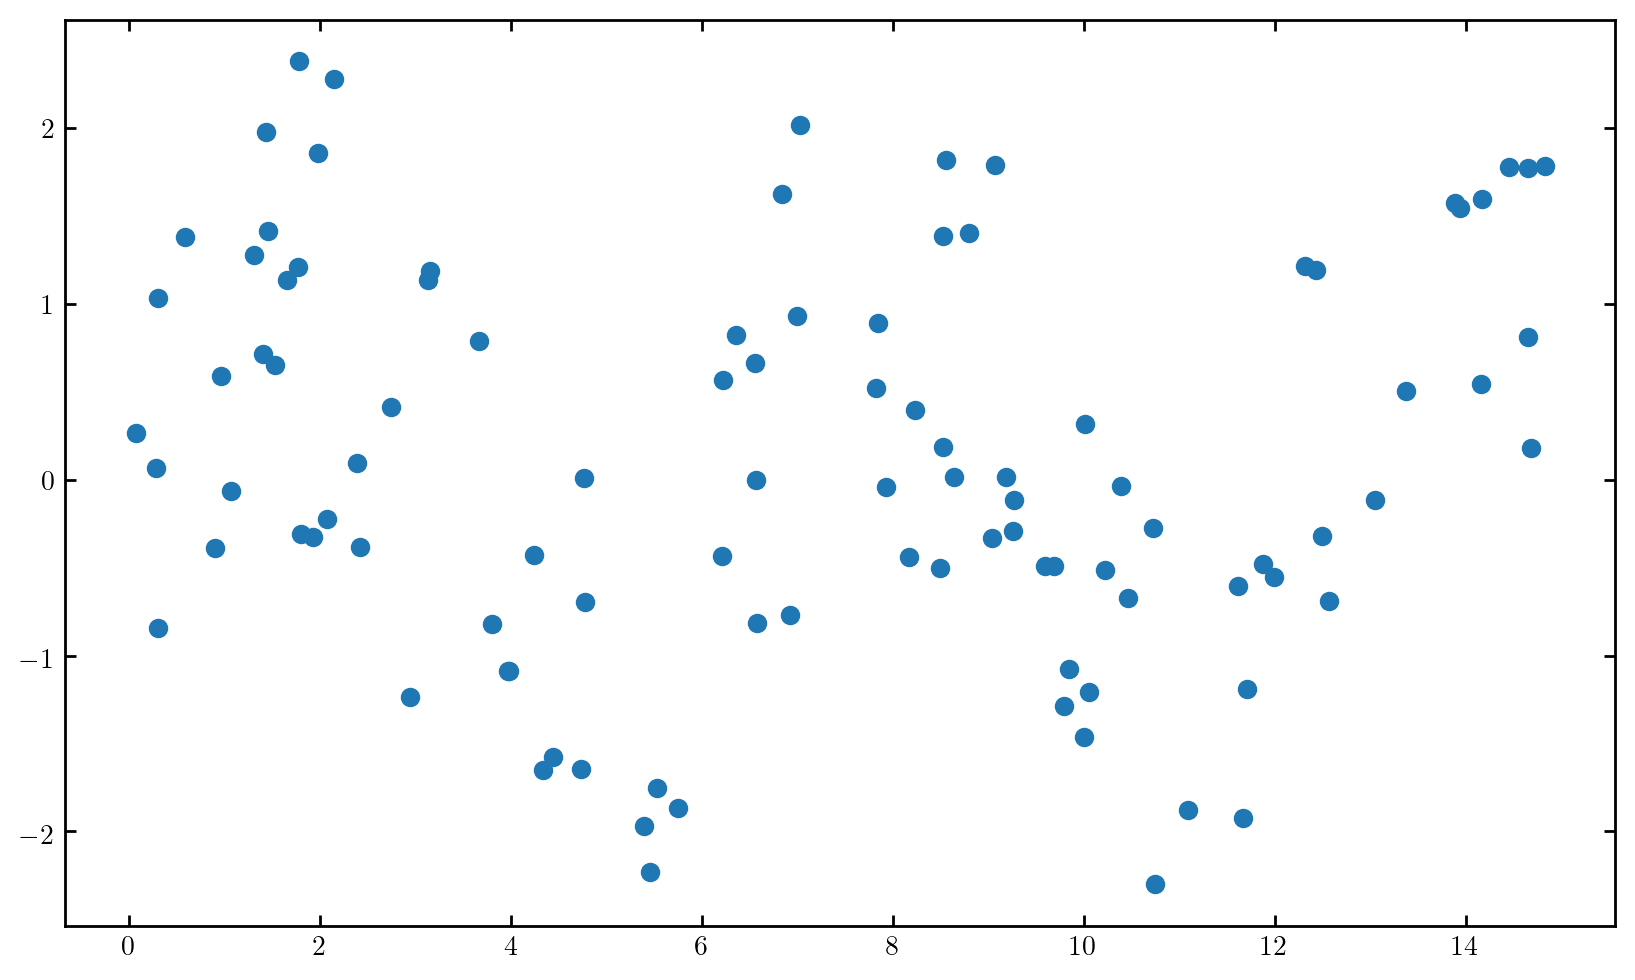

In [3]:
# Generate sample data
rng = np.random.RandomState(0)



X = 15 * rng.rand(100, 1)
y = np.sin(X).ravel()
y += 3 * (0.5 - rng.rand(X.shape[0]))  # add noise

# Plot
plt.plot(X[:,0],y,'o')

In [4]:
# With White Kernel:
gp_kernel = RBF() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=gp_kernel)

gpr.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=RBF(length_scale=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [30]:
# Try again without White Kernel


# Preform Grid Search to find ideal length scale:
param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3],
              "kernel": [RBF(l)
                         for l in np.linspace(1, 5, 10)]
                         }
gp_2 = GridSearchCV(GaussianProcessRegressor(), param_grid=param_grid)

print(gp_2)



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                                                kernel=None,
                                                n_restarts_optimizer=0,
                                                normalize_y=False,
                                                optimizer='fmin_l_bfgs_b',
                                                random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001],
                         'kernel': [RBF(length_scale=1), RBF(length_scale=1.44),
                                    RBF(length_scale=1.89),
                                    RBF(length_scale=2.33),
                                    RBF(length_scale=2.78),
                                    RBF(length_scale=3.22),
                                    RBF(length_scale=3.67),
                                    RBF(le

In [31]:
gp_2.fit(X,y)
gp_2.best_estimator_

/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GaussianProcessRegressor(alpha=1.0, copy_X_train=True,
                         kernel=RBF(length_scale=1.44), n_restarts_optimizer=0,
                         normalize_y=False, optimizer='fmin_l_bfgs_b',
                         random_state=None)

In [32]:
# Take results from grid search
gp_kernel_2 = RBF(length_scale = 1.44, length_scale_bounds=(1e-3, 1e5))
gpr_2 = GaussianProcessRegressor(kernel=gp_kernel_2)

gpr_2.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=RBF(length_scale=1.44), n_restarts_optimizer=0,
                         normalize_y=False, optimizer='fmin_l_bfgs_b',
                         random_state=None)

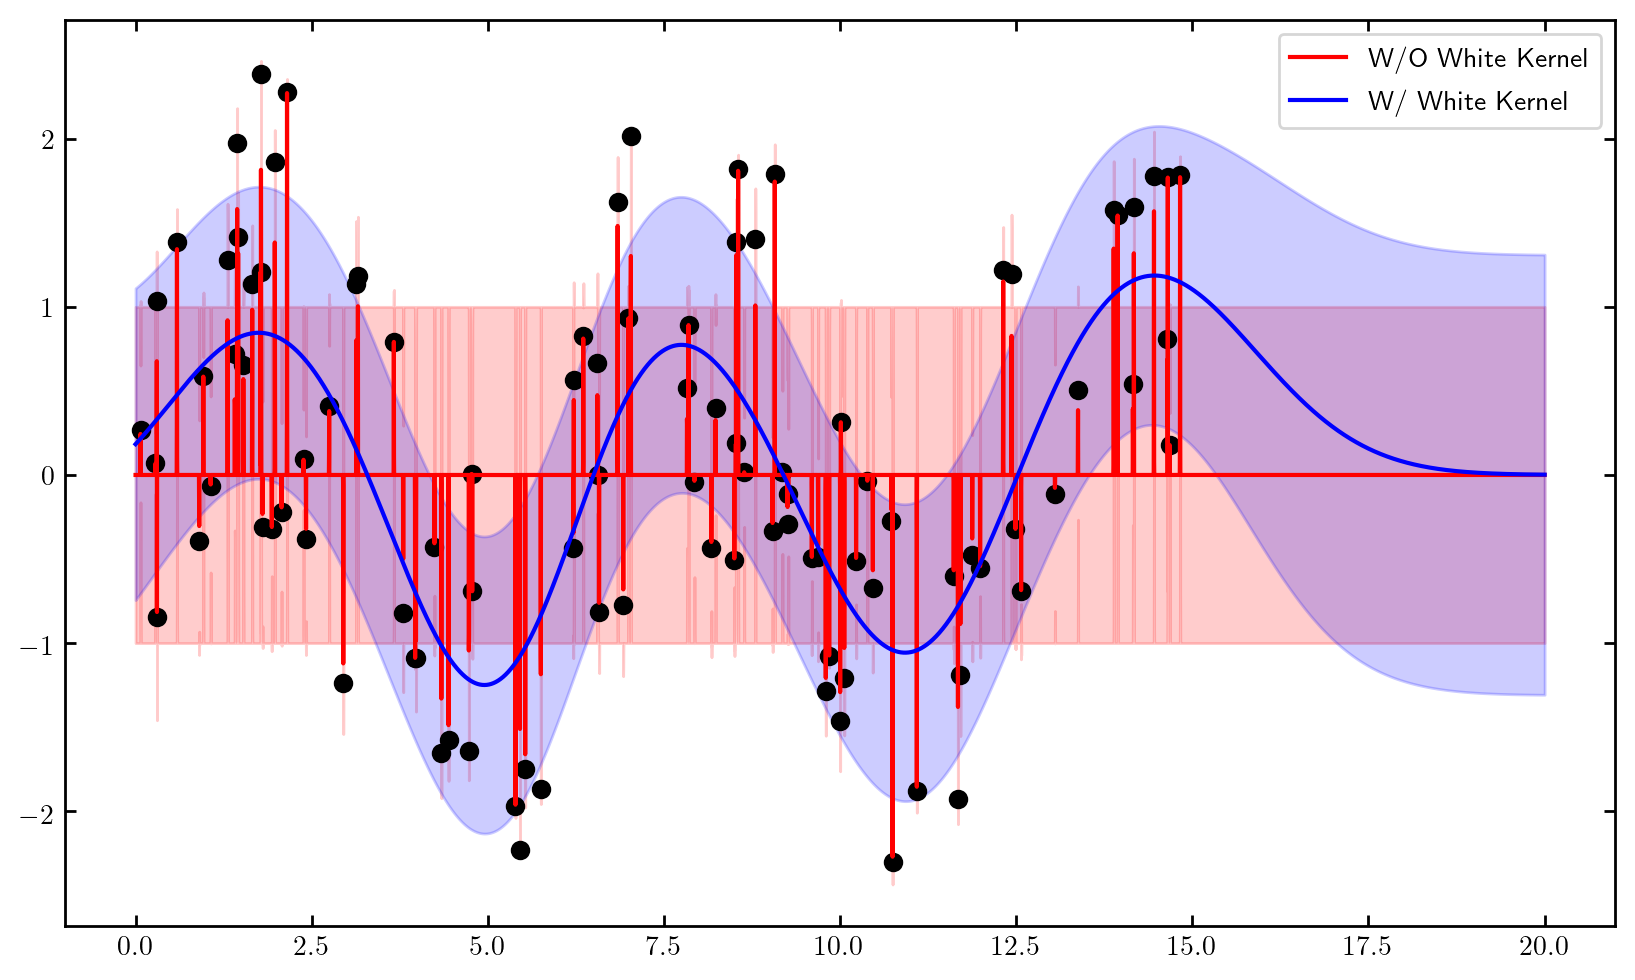

In [33]:
# Plot
X_plot = np.linspace(0, 20, 10000)[:, None]

plt.plot(X[:,0],y,'ko')

# Without White Kernel

y_gpr_2, y_std_2 = gpr_2.predict(X_plot, return_std=True)

plt.plot(X_plot[:,0],y_gpr_2,label='W/O White Kernel', color = 'red')
plt.fill_between(X_plot[:, 0], y_gpr_2 - y_std_2, y_gpr_2 + y_std_2, color='red',
                 alpha=0.2)


# White Kernel
y_gpr = gpr.predict(X_plot, return_std=False)
y_gpr, y_std = gpr.predict(X_plot, return_std=True)
plt.plot(X_plot[:,0],y_gpr,label='W/ White Kernel', color = 'blue')
plt.fill_between(X_plot[:, 0], y_gpr - y_std, y_gpr + y_std, color='blue',
                 alpha=0.2)

plt.legend()

It looks like the White Kernel is required to fit the periodic behavior of the data. Without the White kernel, the fit follows the mean of the data until it jumps up to the y-value of each point. 

________


## Part 2

Re-run the kernel ridge analysis using the `RBF` kernel.  Comment on your results.

### $\textit{Answer:}$


In [38]:
# Fit KernelRidge with parameter selection based on 5-fold cross validation
param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3],
              "kernel": [RBF(l)
                         for l in np.linspace(-10, 10, 100)]
                         }
kr = GridSearchCV(KernelRidge(), param_grid=param_grid)
kr.fit(X, y)

/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None,
                                   kernel='linear', kernel_params=None),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001],
                         'kernel': [RBF(length_scale=-10),
                                    RBF(length_scale=-9.8),
                                    RBF(length_scale=-9.6),
                                    RBF(length_scale=-9.39),
                                    RBF(length_scale=-9.19),
                                    RBF(length_...
                                    RBF(length_scale=-6.16),
                                    RBF(length_scale=-5.96),
                                    RBF(length_scale=-5.76),
                                    RBF(length_scale=-5.56),
                                    RBF(length_scale=-5.35),
                                    RBF(l

In [39]:
# Extrapolate
X_plot = np.linspace(0, 20, 10000)[:, None]
y_kr = kr.predict(X_plot)

In [40]:
# Print results
kr.best_estimator_

KernelRidge(alpha=0.1, coef0=1, degree=3, gamma=None,
            kernel=RBF(length_scale=-2.73), kernel_params=None)

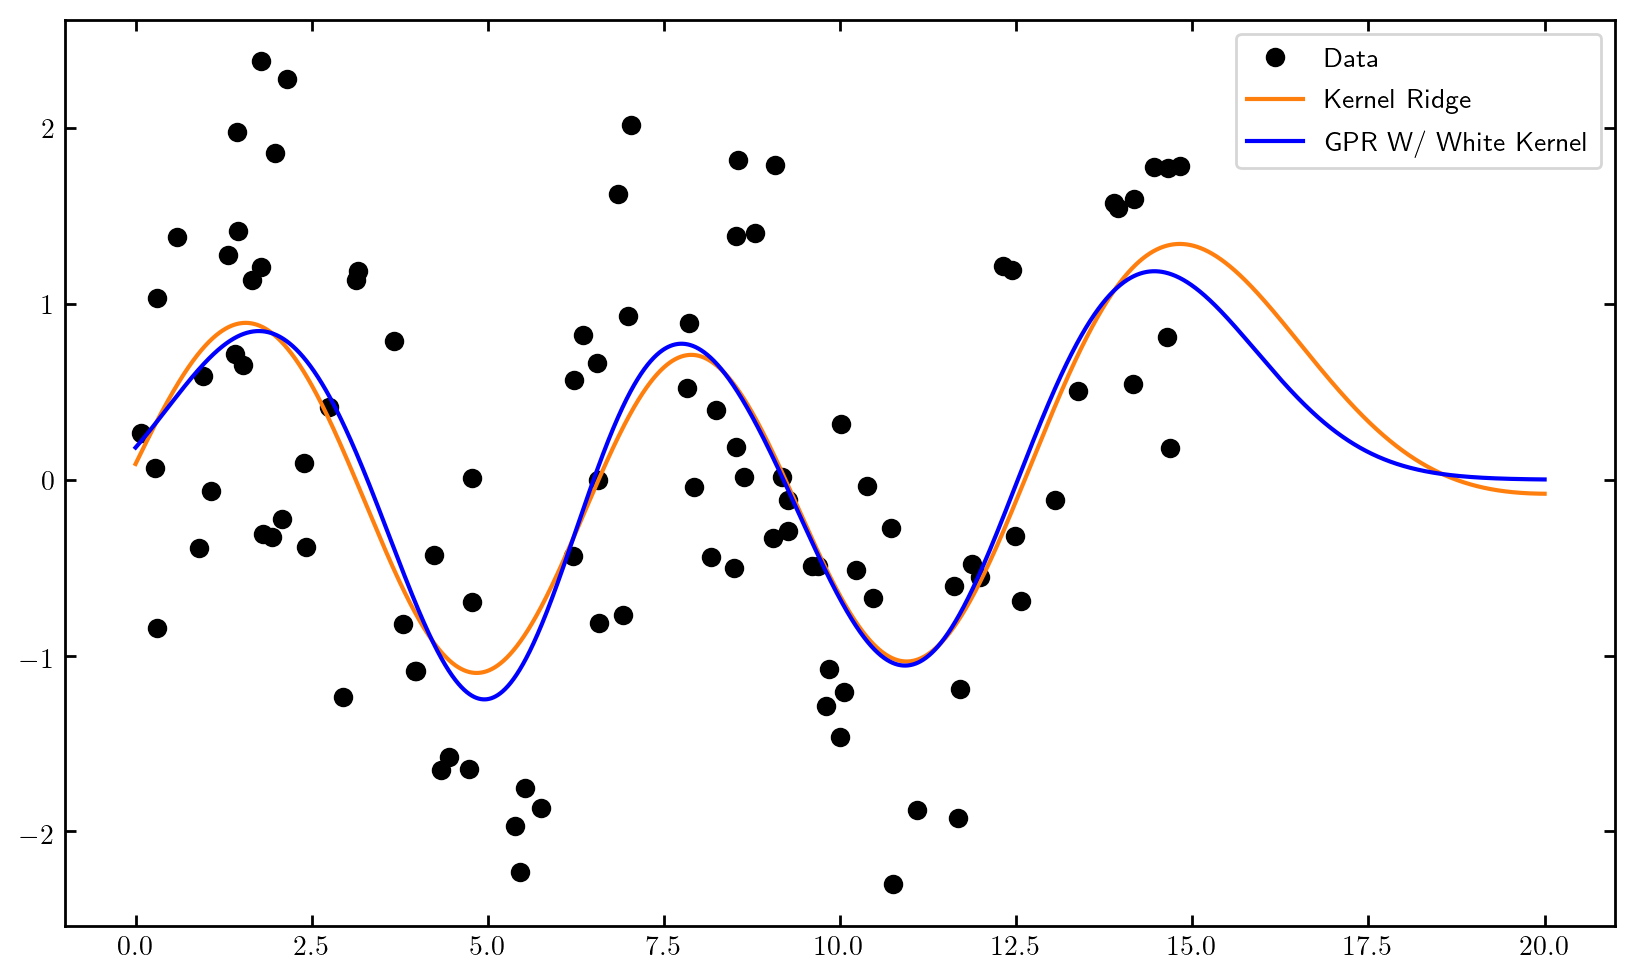

In [41]:
#Plot
plt.plot(X[:,0],y,'ko', label = 'Data')
plt.plot(X_plot[:,0],y_kr, label = 'Kernel Ridge', color = 'tab:orange')

# Compare to Gaussian Process Regression w/ White Kernel
plt.plot(X_plot[:,0],y_gpr,label='GPR W/ White Kernel', color = 'blue')



plt.legend()

It looks like the two processes are fairly consistent across the range. The biggest discrepancies between the KR and GPR methods occur during extrapolation into the regions where there are no data.